In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# import pickle 

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import pickle 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

c:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Load Datasets

In [3]:
# df1 = pd.read_csv("02-14-2018.csv", low_memory=False)
# df2 = pd.read_csv("02-15-2018.csv", low_memory=False)
# df3 = pd.read_csv("02-16-2018.csv", low_memory=False)

In [69]:
# df_total = pd.concat([df1, df2, df3])
df_total = pd.read_csv("df_total.csv", low_memory=False)

# df_total = df1

The datasets are being concatenated here.

In [5]:
# df_total.to_csv('df_total.csv', index=False)

# Exploratory Data Analysis

In [70]:
df_total = df_total[df_total['Dst Port'] != "Dst Port"]

In [71]:
df_total = df_total.dropna(how = "any")

In [73]:
# # Create a sample of the dataset
# df_sample = df_total.sample(1000)

# # Save the sample to a csv file
# df_sample.to_csv("sample.csv", index=False)

In [8]:
df_total.shape

(1000, 80)

In [9]:
df_total.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [10]:
df_total.dtypes

Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int64
Idle Min           int64
Label             object
Length: 80, dtype: object

In [11]:
df_total.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0        80         6  16/02/2018 01:48:35          54125             3   
1     39964         6  16/02/2018 01:48:39        4375704             5   
2     41016         6  16/02/2018 01:46:25        4145738             4   
3        80         6  16/02/2018 01:48:22           7431             2   
4        80         6  16/02/2018 01:47:25          37678             2   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             3              935              301              935   
2             5              935              341              935   
3             0                0                0                0   
4             0                0                0                0   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                32          0.0         0.0   
1                0  ...                32          0.0         0.0   
2                0  ...                32          0.0         0.0   
3                0  ...                32          0.0         0.0   
4                0  ...                32          0.0         0.0   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
0           0           0        0.0       0.0         0         0   
1           0           0        0.0       0.0         0         0   
2           0           0        0.0       0.0         0         0   
3           0           0        0.0       0.0         0         0   
4           0           0        0.0       0.0         0         0   

              Label  
0  DoS attacks-Hulk  
1            Benign  
2            Benign  
3  DoS attacks-Hulk  
4  DoS attacks-Hulk  

[5 rows x 80 columns]

In [12]:
df_total_transformed = df_total.convert_dtypes()

In [13]:
# Assuming the 'Timestamp' column is in a datetime format
df_total_transformed["Timestamp"] = pd.to_datetime(df_total_transformed["Timestamp"])
df_total_transformed_temp = df_total_transformed.set_index("Timestamp")

# Create the frequency chart
fig = go.Figure()

# Add the traces for each attack type
for attack_type in df_total_transformed_temp["Label"].unique():
    attack_data = df_total_transformed_temp.loc[df_total_transformed_temp["Label"] == attack_type, :]
    fig.add_trace(go.Scatter(
        x=attack_data.index,
        y=attack_data.groupby(pd.Grouper(freq="H")).size(),
        mode='lines',
        name=attack_type,
        hovertemplate='Time: %{x}<br>Attack Type: %{customdata}<br>Count: %{y}',
        customdata=[attack_type] * len(attack_data)
    ))

# Update the layout
fig.update_layout(
    width=800,
    height=600,
    title='Frequency of Attack Types Over Time',
    xaxis_title='Time',
    yaxis_title='Attack Count',
    hovermode='x unified'
)

fig.show()

<ipython-input-13-d7c03799c06a>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total_transformed["Timestamp"] = pd.to_datetime(df_total_transformed["Timestamp"])


In [14]:
df_total_transformed.drop(["Timestamp"], axis=1, inplace=True)

In [15]:
# df_total_transformed = df_total_transformed.astype(np.float32)

In [16]:
features = df_total_transformed[df_total_transformed.columns[:-1]]

In [17]:
features = features.astype(np.float32)

In [18]:
for col in features.columns:
    print(features[col].dtype)

float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32


In [19]:
labels = df_total_transformed[[df_total_transformed.columns[-1]]]

In [20]:
labels.head()

Label
0  DoS attacks-Hulk
1            Benign
2            Benign
3  DoS attacks-Hulk
4  DoS attacks-Hulk

In [21]:
unique_labels = labels["Label"].unique()
unique_labels

<StringArray>
['DoS attacks-Hulk', 'Benign', 'DoS attacks-SlowHTTPTest']
Length: 3, dtype: string

In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder = None

if os.path.exists("labels_encoder.pkl"):
    encoder = pickle.load(open("labels_encoder.pkl", "rb"))
else:
    encoder = OrdinalEncoder()
    encoder.fit(labels)
    pickle.dump(encoder, open("labels_encoder.pkl", "wb"))

labels_encoded = encoder.transform(labels)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning:

Trying to unpickle estimator OrdinalEncoder from version 1.2.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.



In [23]:
encoder.categories_

[array(['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk',
        'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris',
        'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)]

Therefore, Benign is 0, DoS attacks-GoldenEye is 1, and so on...

In [24]:
encoder_labels = {idx: ele for idx, ele in enumerate(list(encoder.categories_[0]))}

In [25]:
encoder_labels

{0: 'Benign',
 1: 'DoS attacks-GoldenEye',
 2: 'DoS attacks-Hulk',
 3: 'DoS attacks-SlowHTTPTest',
 4: 'DoS attacks-Slowloris',
 5: 'FTP-BruteForce',
 6: 'SSH-Bruteforce'}

In [26]:
labels_encoded.max()

3.0

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df_total_transformed.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [29]:
# df.drop(["Timestamp"], axis=1)

In [30]:
features

Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0        80.0       6.0        54125.0           3.0           0.0   
1     39964.0       6.0      4375704.0           5.0           3.0   
2     41016.0       6.0      4145738.0           4.0           5.0   
3        80.0       6.0         7431.0           2.0           0.0   
4        80.0       6.0        37678.0           2.0           0.0   
..        ...       ...            ...           ...           ...   
995      80.0       6.0          441.0           2.0           0.0   
996   37888.0       6.0      4391040.0           5.0           3.0   
997      80.0       6.0         2384.0           2.0           0.0   
998   34422.0       6.0      4315628.0           5.0           3.0   
999      80.0       6.0        33018.0           3.0           4.0   

     TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0                0.0              0.0              0.0              0.0   
1              935.0            301.0            935.0              0.0   
2              935.0            341.0            935.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
995              0.0              0.0              0.0              0.0   
996            935.0            357.0            935.0              0.0   
997              0.0              0.0              0.0              0.0   
998            935.0            312.0            935.0              0.0   
999            358.0            935.0            358.0              0.0   

     Fwd Pkt Len Mean  ...  Fwd Act Data Pkts  Fwd Seg Size Min  Active Mean  \
0            0.000000  ...                0.0              32.0          0.0   
1          187.000000  ...                1.0              32.0          0.0   
2          233.750000  ...                1.0              32.0          0.0   
3            0.000000  ...                0.0              32.0          0.0   
4            0.000000  ...                0.0              32.0          0.0   
..                ...  ...                ...               ...          ...   
995          0.000000  ...                0.0              32.0          0.0   
996        187.000000  ...                1.0              32.0          0.0   
997          0.000000  ...                0.0              32.0          0.0   
998        187.000000  ...                1.0              32.0          0.0   
999        119.333336  ...                1.0              32.0          0.0   

     Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  \
0           0.0         0.0         0.0        0.0       0.0       0.0   
1           0.0         0.0         0.0        0.0       0.0       0.0   
2           0.0         0.0         0.0        0.0       0.0       0.0   
3           0.0         0.0         0.0        0.0       0.0       0.0   
4           0.0         0.0         0.0        0.0       0.0       0.0   
..          ...         ...         ...        ...       ...       ...   
995         0.0         0.0         0.0        0.0       0.0       0.0   
996         0.0         0.0         0.0        0.0       0.0       0.0   
997         0.0         0.0         0.0        0.0       0.0       0.0   
998         0.0         0.0         0.0        0.0       0.0       0.0   
999         0.0         0.0         0.0        0.0       0.0       0.0   

     Idle Min  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
..        ...  
995       0.0  
996       0.0  
997       0.0  
998       0.0  
999       0.0  

[1000 rows x 78 columns]

In [31]:
for col in features.columns:
    if features[col].dtype == "str":
        print(col)

In [32]:
col_wrong = []

for col in features.columns:
    try:
        features[col] = LabelEncoder().fit_transform(features[col])
    except:
        col_wrong.append(col)
        pass

print(len(col_wrong))
print(col_wrong)

0
[]


In [33]:
features.head()

Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0         1         0            397             2             0   
1        80         0            706             4             3   
2        97         0            545             3             5   
3         1         0            214             1             0   
4         1         0            348             1             0   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0                0                0                0                0   
1               30                9               30                0   
2               30               48               30                0   
3                0                0                0                0   
4                0                0                0                0   

   Fwd Pkt Len Mean  ...  Fwd Act Data Pkts  Fwd Seg Size Min  Active Mean  \
0                 0  ...                  0                 1            0   
1                32  ...                  1                 1            0   
2                33  ...                  1                 1            0   
3                 0  ...                  0                 1            0   
4                 0  ...                  0                 1            0   

   Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  
0           0           0           0          0         0         0         0  
1           0           0           0          0         0         0         0  
2           0           0           0          0         0         0         0  
3           0           0           0          0         0         0         0  
4           0           0           0          0         0         0         0  

[5 rows x 78 columns]

In [34]:
features.dtypes

Dst Port         int64
Protocol         int64
Flow Duration    int64
Tot Fwd Pkts     int64
Tot Bwd Pkts     int64
                 ...  
Active Min       int64
Idle Mean        int64
Idle Std         int64
Idle Max         int64
Idle Min         int64
Length: 78, dtype: object

In [35]:
labels_encoded

array([[2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [3.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [3.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [3.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],

In [36]:
features["Dst Port"].apply(int)

0       1
1      80
2      97
3       1
4       1
       ..
995     1
996    59
997     1
998    23
999     1
Name: Dst Port, Length: 1000, dtype: int64

# Gator Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = None

if os.path.exists("classifier.pkl"):
    classifier = pickle.load(open("classifier.pkl", "rb"))
else: 
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(features, labels_encoded)
    pickle.dump(classifier, open("classifier.pkl", "wb"))


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.



# Predictions

In [38]:
# classifier.predict(features.head())
[encoder_labels[x] for x in classifier.predict(features.head())]

['Benign', 'Benign', 'Benign', 'Benign', 'Benign']

In [39]:
[encoder_labels[x] for x in classifier.predict(features.tail(10))]

['Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign']

0 stands for Benign.

In [41]:
# [encoder_labels[x] for x in classifier.predict(features.iloc[1000:1050,:])]
[encoder_labels[x] for x in classifier.predict(features.iloc[950:1000,:])]


['Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign']

# Accuracy

In [42]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = classifier.predict(features)

# Calculate the accuracy score
accuracy = accuracy_score(labels_encoded.ravel(), y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.41


## Visualization Report

In [43]:
# Create the figure
fig = go.Figure()

# Add the bar traces
fig.add_trace(go.Bar(
    name='Benign',
    y=df_total["Label"].value_counts().values[0:1],
    x=['Benign'],
    text=df_total["Label"].value_counts()[0:1],
    hovertemplate='Attack Type: %{x}<br>Count: %{y}',
    marker_color='seagreen'
))

fig.add_trace(go.Bar(
    name='DoS attacks-GoldenEye',
    y=df_total["Label"].value_counts().values[1:2],
    x=['DoS attacks-GoldenEye'],
    text=df_total["Label"].value_counts()[1:2],
    hovertemplate='Attack Type: %{x}<br>Count: %{y}',
    marker_color='yellowgreen'
))


fig.add_trace(go.Bar(
    name='FTP-BruteForce',
    y=df_total["Label"].value_counts().values[1:2],
    x=['FTP-BruteForce'],
    text=df_total["Label"].value_counts()[1:2],
    hovertemplate='Attack Type: %{x}<br>Count: %{y}',
    marker_color='gold'
))

fig.add_trace(go.Bar(
    name='DoS attacks-SlowHTTPTest',
    y=df_total["Label"].value_counts().values[2:],
    x=['DoS attacks-SlowHTTPTest'],
    text=df_total["Label"].value_counts()[2:],
    hovertemplate='Attack Type: %{x}<br>Count: %{y}',
    marker_color='orange'
))

fig.add_trace(go.Bar(
    name='DoS attacks-Hulk',
    y=df_total["Label"].value_counts().values[2:],
    x=['DoS attacks-Hulk'],
    text=df_total["Label"].value_counts()[2:],
    hovertemplate='Attack Type: %{x}<br>Count: %{y}',
    marker_color='lightcoral'
))

fig.add_trace(go.Bar(
    name='DoS attacks-Slowloris',
    y=df_total["Label"].value_counts().values[2:],
    x=['DoS attacks-Slowloris'],
    text=df_total["Label"].value_counts()[2:],
    hovertemplate='Attack Type: %{x}<br>Count: %{y}',
    marker_color='plum'
))

fig.add_trace(go.Bar(
    name='SSH-Bruteforce',
    y=df_total["Label"].value_counts().values[2:],
    x=['SSH-Bruteforce'],
    text=df_total["Label"].value_counts()[2:],
    hovertemplate='Attack Type: %{x}<br>Count: %{y}',
    marker_color='orchid'
))


# Update the layout
fig.update_layout(
    width=800,
    height=600,
    title='Class Distribution',
    yaxis_title='Number of attacks',
    xaxis_title='Attack Name',
    bargap=0.1
)

fig.show()


In [44]:
# Get the counts of benign and attack requests
request_counts = df_total["Label"].value_counts()
benign_count = request_counts["Benign"]
attack_count = request_counts.sum() - benign_count

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=['Benign', 'Attack'],
                            values=[benign_count, attack_count],
                            hoverinfo='label+percent',
                            textinfo='value')])

fig.update_layout(
    width=800,
    height=600,
    title='Benign vs. Attack Requests',
    legend=dict(
        x=0.5,
        y=1.1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

fig.show()


In [45]:
type(attack_count)

numpy.int64

In [46]:
labels

Label
0    DoS attacks-Hulk
1              Benign
2              Benign
3    DoS attacks-Hulk
4    DoS attacks-Hulk
..                ...
995  DoS attacks-Hulk
996            Benign
997  DoS attacks-Hulk
998            Benign
999  DoS attacks-Hulk

[1000 rows x 1 columns]

In [47]:
import plotly.graph_objects as go

# Assuming 'features' is your DataFrame and 'Dst Port' is your column of interest
data = features["Dst Port"]

# Create a histogram with logarithmic scale
fig = go.Figure(data=[go.Histogram(x=data, nbinsx=50, histnorm='probability')])

# Update layout for logarithmic scale and labels
fig.update_layout(
    title_text='Distribution of Destination Ports', # title of plot
    xaxis_title_text='Destination Port', # xaxis label
    yaxis_title_text='Frequency', # yaxis label
    yaxis_type="log" # logarithmic scale
)

fig.show()


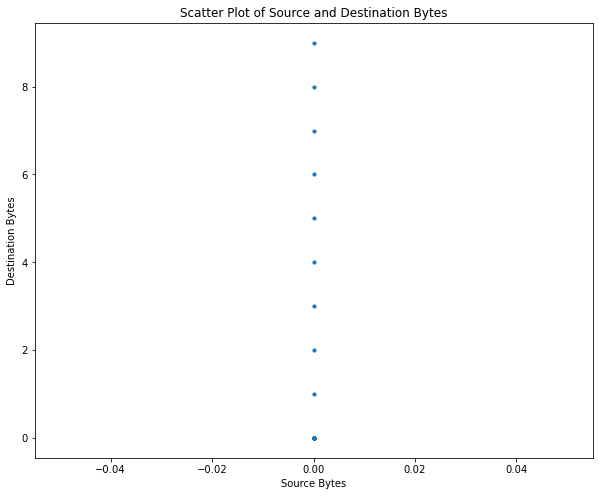

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(features["Fwd Pkt Len Min"], features["Active Mean"], s=10)
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.title("Scatter Plot of Source and Destination Bytes")
plt.show()


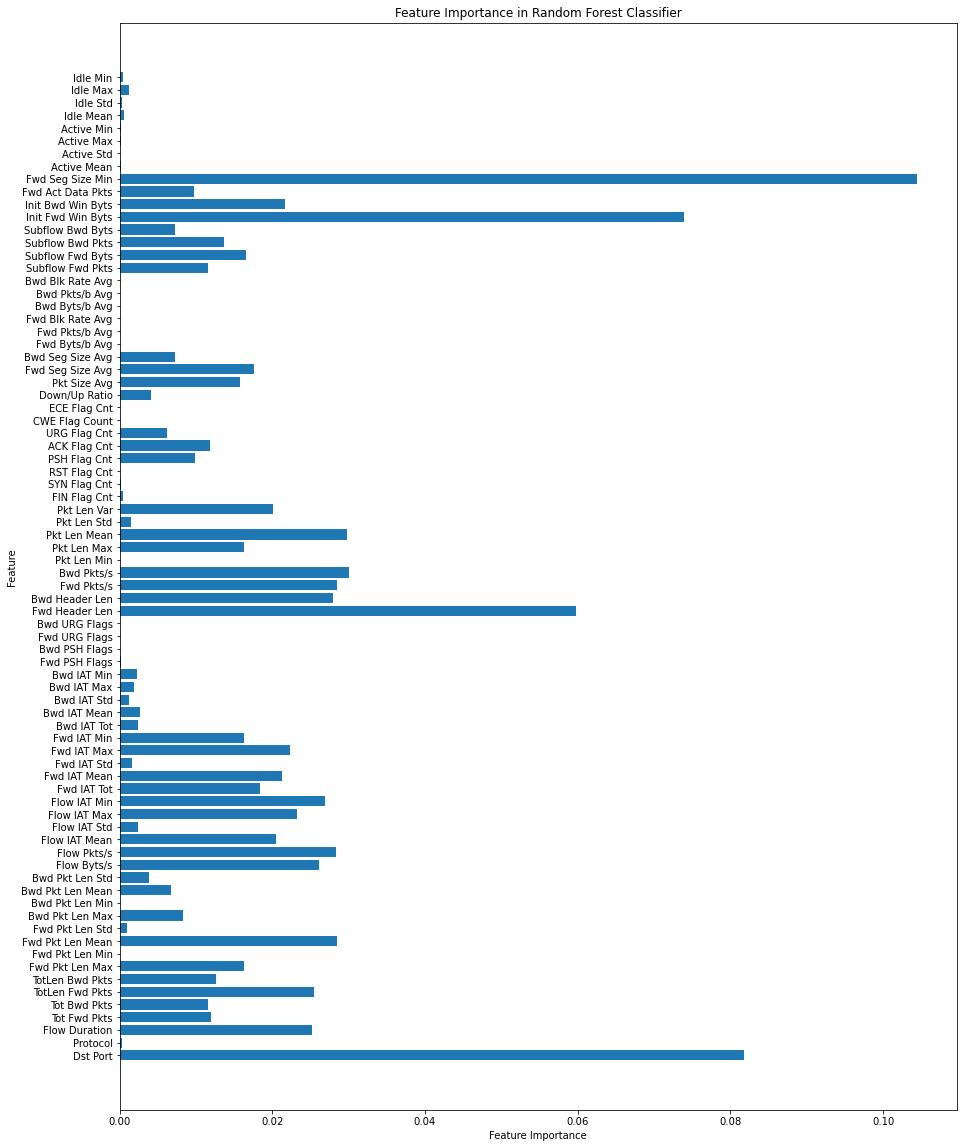

In [50]:
feature_importances = classifier.feature_importances_
feature_names = features.columns

plt.figure(figsize=(15, 20))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()


In [51]:
# Assuming you have the 'features' DataFrame
fig = go.Figure(data=go.Splom(
    dimensions=[dict(label=col, values=features.iloc[:1000, :][col]) for col in features.columns[:5]],
    marker=dict(color=labels_encoded, colorscale='Viridis')
))

fig.update_layout(
    title='Interactive Scatter Plot Matrix',
    width=800,
    height=800,
    dragmode='select'
)

fig.show()

In [52]:
features['Bwd Pkt Len Mean']

0        0
1       55
2       12
3        0
4        0
      ... 
995      0
996    106
997      0
998     66
999    185
Name: Bwd Pkt Len Mean, Length: 1000, dtype: int64

In [53]:
labels_encoded[0]

array([2.])

In [54]:
[encoder_labels[label[0]] for label in labels_encoded]

# for label in labels_encoded:
#     print(encoder_labels[label])

['DoS attacks-Hulk',
 'Benign',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'Benign',
 'Benign',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'Benign',
 'Benign',
 'DoS attacks-Hulk',
 'Benign',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Hulk',
 'Benign',
 'DoS attacks-Hulk',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'Benign',
 'DoS attacks-Hulk',
 'Benign',
 'DoS attacks-SlowHTTPTest',
 'Benign',
 'DoS attacks-Hulk',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'Benign',
 'Benign',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'Benign',
 'Benign',
 'Benign',
 'DoS attacks-Hulk',
 'DoS attack

In [55]:
# Create the scatter plot
fig = go.Figure(data=go.Scatter(
    x=features['Fwd Pkt Len Mean'].tolist(),
    y=features['Bwd Pkt Len Mean'].tolist(),
    mode='markers',
    marker=dict(
        color=labels_encoded,
        colorscale='Viridis',
        opacity=0.7,
        size=7
    ),
    hovertemplate='Source Bytes: %{x}<br>Destination Bytes: %{y}<br>Attack Type: %{text}',
    text=[encoder_labels[label[0]] for label in labels_encoded]
))

fig.update_layout(
    width=800,
    height=600,
    title='Scatter Plot of Source and Destination Bytes',
    xaxis_title='Source Bytes',
    yaxis_title='Destination Bytes',
    hovermode='closest'
)

fig.show()

In [56]:
# df_total.columns

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (7).

<Figure size 3600x3600 with 0 Axes>

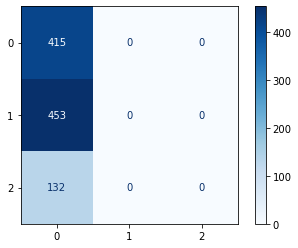

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = classifier.predict(features)

# Create the confusion matrix
cm = confusion_matrix(labels_encoded.ravel(), y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(encoder_labels.values()))

# Plot the confusion matrix
plt.figure(figsize=(50, 50))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
# plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (7).

<Figure size 3600x3600 with 0 Axes>

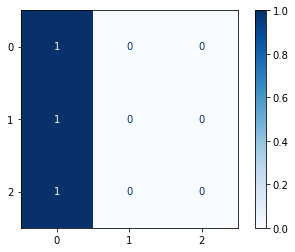

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test data
y_pred = classifier.predict(features)

# Create the confusion matrix
cm = confusion_matrix(labels_encoded.ravel(), y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create the normalized confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=list(encoder_labels.values()))

# Plot the normalized confusion matrix
plt.figure(figsize=(50, 50))
disp.plot(cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

In [61]:
import plotly.express as px
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
fig =px.scatter(df_total, x = "Bwd Pkts/s",y="Fwd Seg Size Min", color = "Label" )

fig.show()

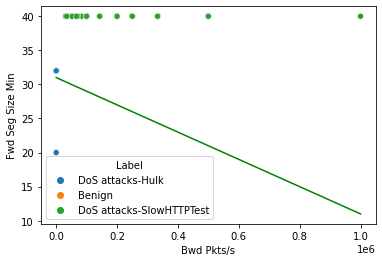

In [64]:
sns.scatterplot(data = df_total_transformed, x = "Bwd Pkts/s",y="Fwd Seg Size Min", hue = "Label" )
xline = np.linspace(df_total_transformed["Bwd Pkts/s"].min(),df_total_transformed["Bwd Pkts/s"].max(), num = 300)
yline = np.linspace(df_total_transformed["Fwd Seg Size Min"].max(), df_total_transformed["Fwd Seg Size Min"].min(), num = 300)
_=plt.plot(xline,yline-9, color = "green")

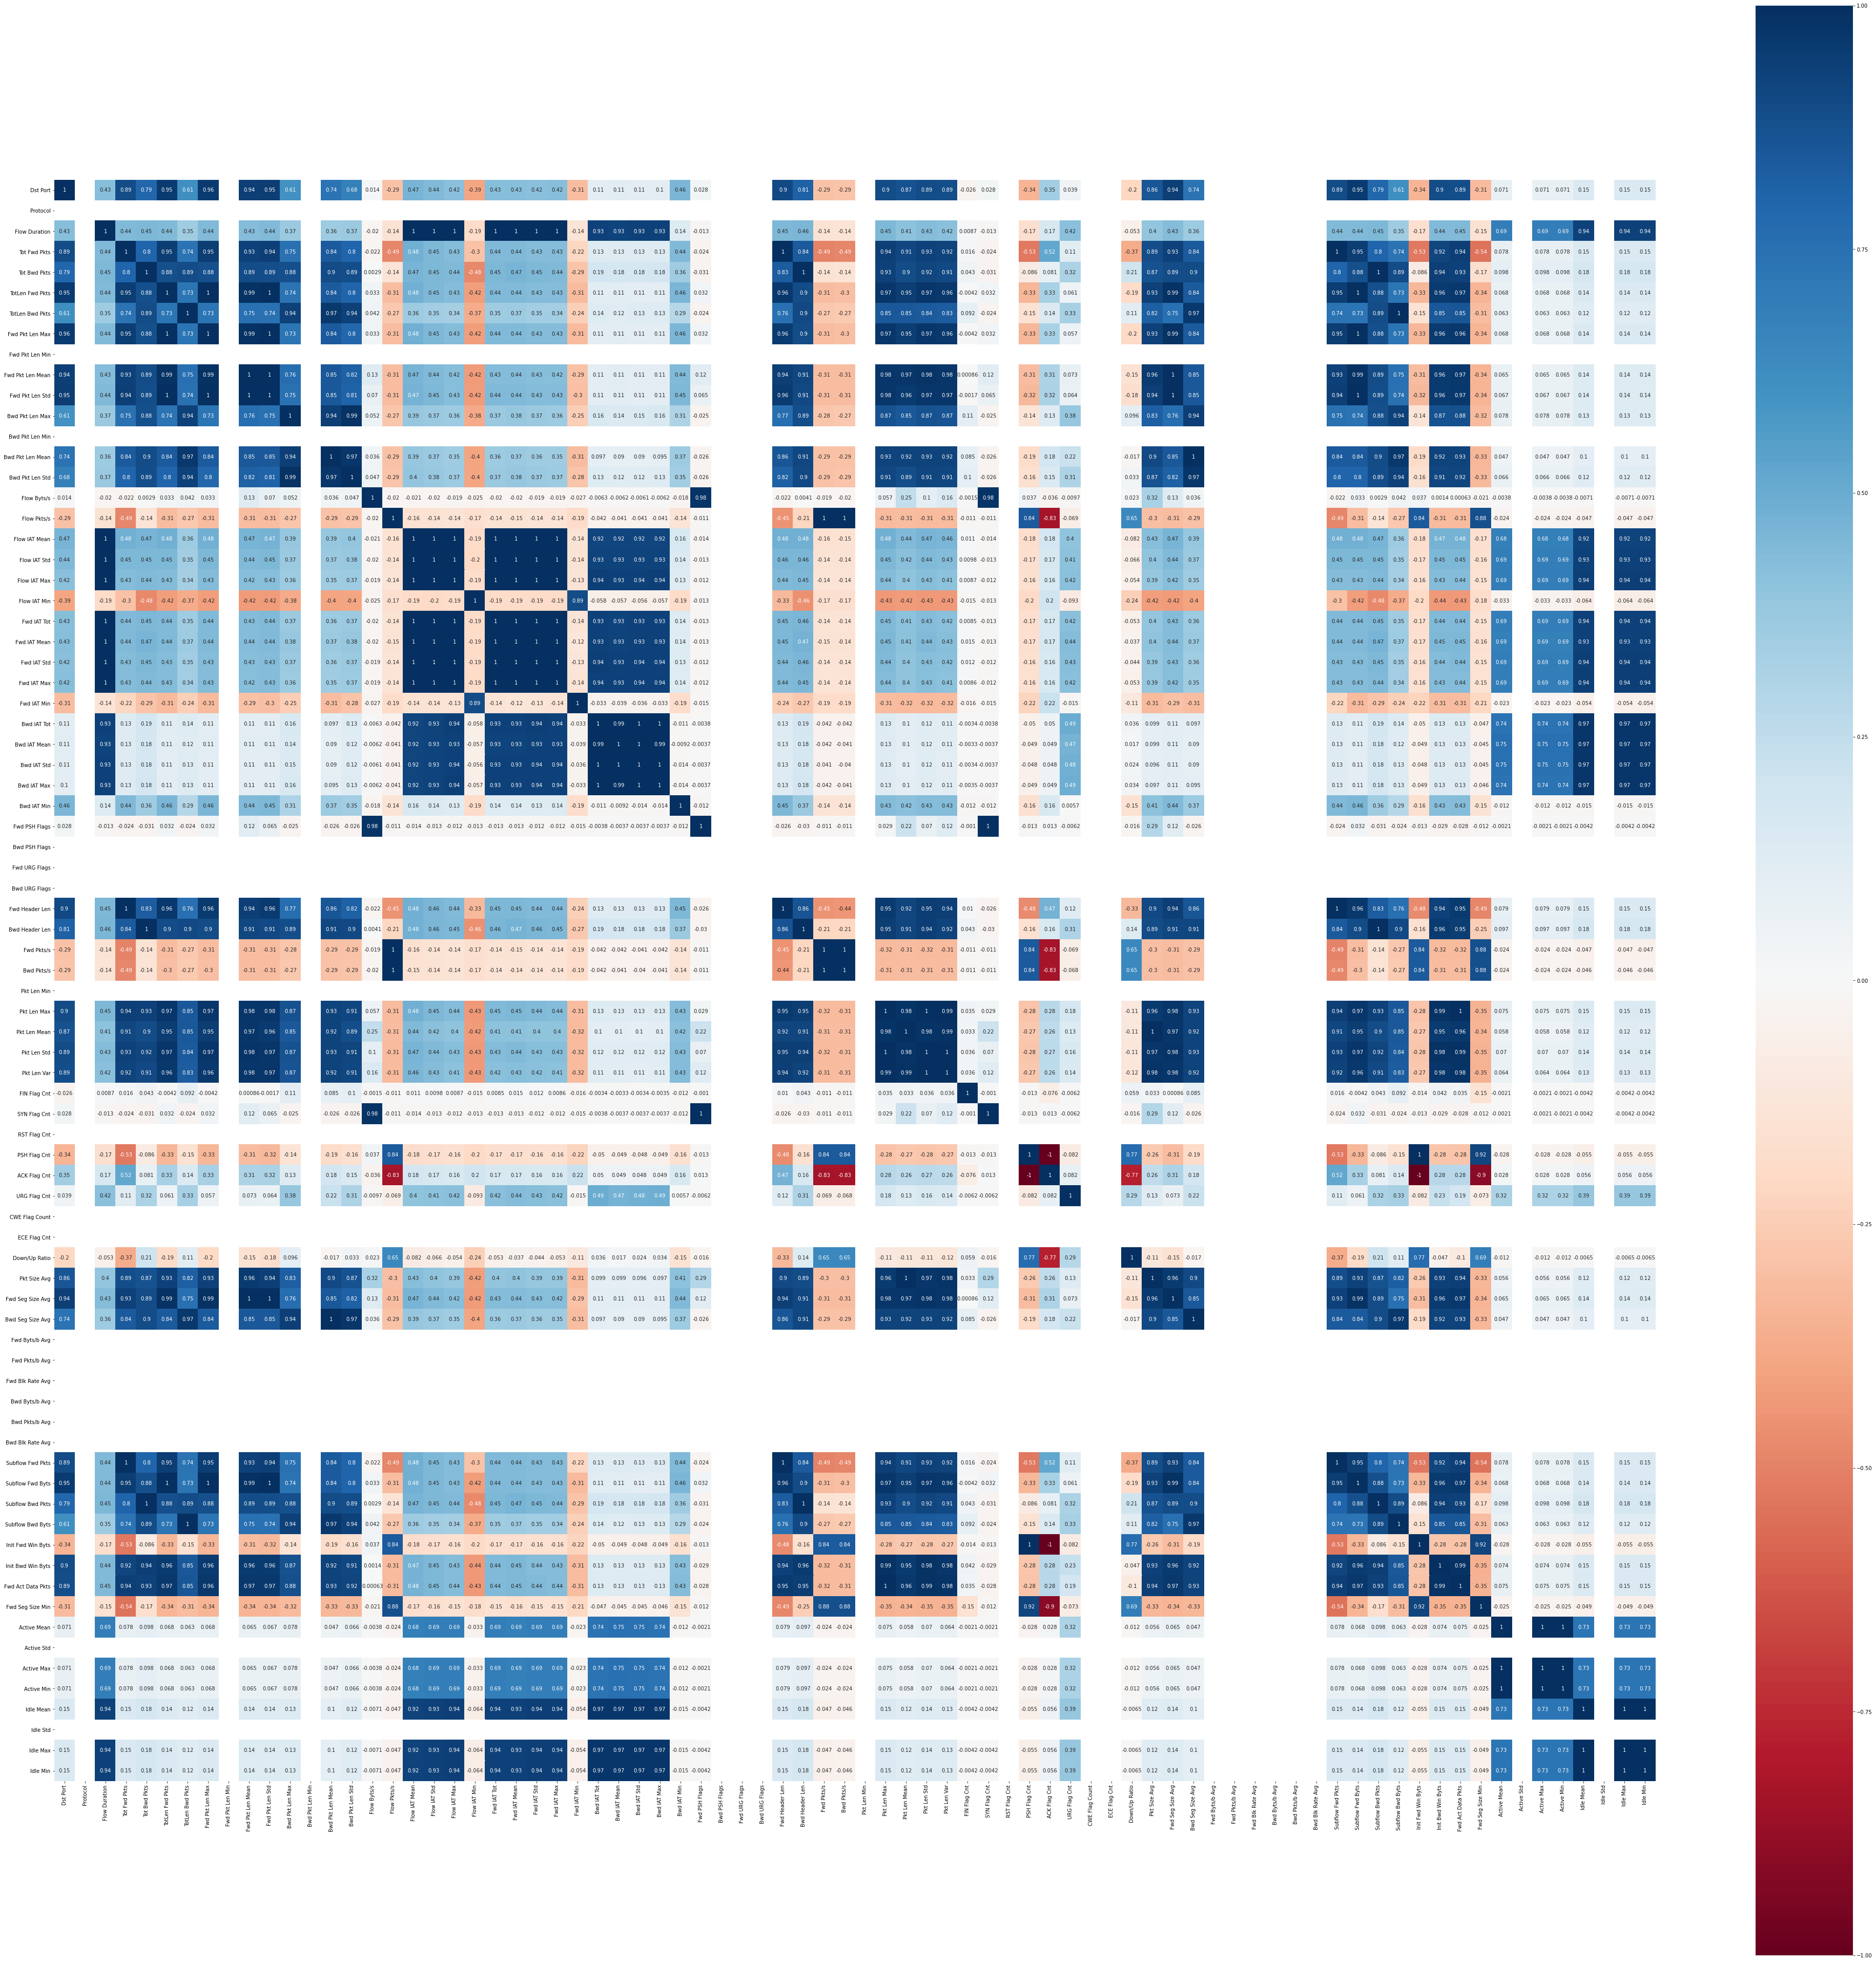

Wall time: 26.1 s


In [66]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_total_transformed.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()